In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import nltk

In [2]:
# Read in csv containing cleaned reviews.
reviews = pd.read_csv("reviews_cleaned.csv")
reviews

,Unnamed: 0,clarityRating,helpfulRating,difficultyRating,qualityRating,comment,commentWords
0,0,5,5,1,5.0,He is amazing! I had lots of fun in his class....,amazing lot fun class get use may seem little ...
1,1,2,1,2,1.5,"Bad prof, simply put. Thankfully, Borgen is ap...",bad prof simply put thankfully apparently reti...
2,2,2,1,2,1.5,"Pretentious, disorganized, rants, and goes off...",pretentious disorganize rant go tangent readin...
3,3,2,2,3,2.0,"Very disorganized in lecture, does not go into...",disorganize lecture not go detail explain term...
4,4,3,2,2,2.5,"Pretentious, scatter brained, and enjoys belit...",pretentious scatter brain enjoy student stupid...
...,...,...,...,...,...,...,...
64860,65888,2,2,4,2.0,Probably one of the worst classes I've taken h...,probably one bad class take feel support guide...
64861,65889,2,2,4,2.0,Reading memos are time consuming and there is ...,reading memo time consume one due every class ...
64862,65890,4,4,4,4.0,This class was great and the professor is real...,class great professor really knowledgeable thi...
64863,65891,4,4,4,4.0,Professor Clerge gave us good readings and add...,professor give u good reading additional optio...


In [3]:
# Convert review comments to strings.
reviews = reviews.astype({'commentWords':'string'})
reviews

,Unnamed: 0,clarityRating,helpfulRating,difficultyRating,qualityRating,comment,commentWords
0,0,5,5,1,5.0,He is amazing! I had lots of fun in his class....,amazing lot fun class get use may seem little ...
1,1,2,1,2,1.5,"Bad prof, simply put. Thankfully, Borgen is ap...",bad prof simply put thankfully apparently reti...
2,2,2,1,2,1.5,"Pretentious, disorganized, rants, and goes off...",pretentious disorganize rant go tangent readin...
3,3,2,2,3,2.0,"Very disorganized in lecture, does not go into...",disorganize lecture not go detail explain term...
4,4,3,2,2,2.5,"Pretentious, scatter brained, and enjoys belit...",pretentious scatter brain enjoy student stupid...
...,...,...,...,...,...,...,...
64860,65888,2,2,4,2.0,Probably one of the worst classes I've taken h...,probably one bad class take feel support guide...
64861,65889,2,2,4,2.0,Reading memos are time consuming and there is ...,reading memo time consume one due every class ...
64862,65890,4,4,4,4.0,This class was great and the professor is real...,class great professor really knowledgeable thi...
64863,65891,4,4,4,4.0,Professor Clerge gave us good readings and add...,professor give u good reading additional optio...


In [4]:
# Remove any rows with NAs that remain.
reviews = reviews.dropna()

## Logistic Regression

We need to create a new column for sentiment for our logistic regression model. We will consider quality scores above 3 to be positive and those below 3 to be negative. Rows with scores of 3 exactly will be removed.

In [5]:
# Remove rows from the dataframe where score is 3
reviews = reviews[reviews['qualityRating'] != 3.0]

In [6]:
# Add a new column for 'sentiment'
sentiment = reviews['qualityRating'].apply(lambda x: 1 if x > 3 else -1)
reviews = reviews.assign(sentiment=sentiment)

Here we need to split the data into a training set and a test set. Typically, this is done with a 80/20 ratio.

In [7]:
# Split the data into a 80% train set and a 20% test set
rv_train, rv_test = train_test_split(reviews, test_size=0.2)

Now we need to create a bag of words model out of our comments.

In [8]:
# Create count vectorizer object to generate sparse matrix.
count_vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize)

In [9]:
# COMMENT
rv_train_matrix = count_vectorizer.fit_transform(rv_train['commentWords'])

In [10]:
# COMMENT
rv_test_matrix = count_vectorizer.transform(rv_test['commentWords'])

In [25]:
rv_train_matrix

<47118x9885 sparse matrix of type '<class 'numpy.int64'>'
	with 940717 stored elements in Compressed Sparse Row format>

Conduct a basic logistic regression.

In [11]:
# Initialize logistic regression object.
lr = LogisticRegression(max_iter = 1000000)

In [12]:
# Fit the logistic regression model.
lr.fit(rv_train_matrix, rv_train['sentiment'])

LogisticRegression(max_iter=1000000)

In [13]:
# COMMENT
pred = lr.predict(rv_test_matrix)

In [14]:
# Output the classification report of the logistic regression.
print(classification_report(pred, rv_test['sentiment']))

              precision    recall  f1-score   support

          -1       0.77      0.84      0.80      3218
           1       0.94      0.91      0.92      8562

    accuracy                           0.89     11780
   macro avg       0.86      0.87      0.86     11780
weighted avg       0.89      0.89      0.89     11780



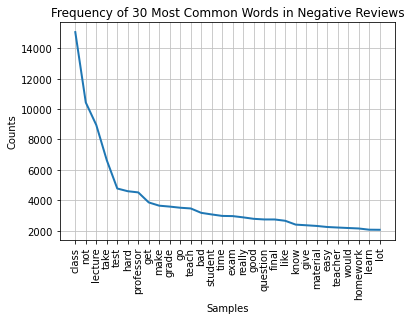

<AxesSubplot:title={'center':'Frequency of 30 Most Common Words in Negative Reviews'}, xlabel='Samples', ylabel='Counts'>

In [15]:
# Create a plot of the frequency of the 30 most common words in negative reviews.
reviews_neg = reviews[sentiment == -1]
words = " ".join(reviews_neg.commentWords)
words = words.split()
freq = nltk.FreqDist(words)
freq.plot(30, title="Frequency of 30 Most Common Words in Negative Reviews")

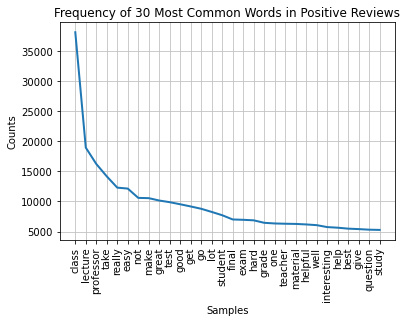

<AxesSubplot:title={'center':'Frequency of 30 Most Common Words in Positive Reviews'}, xlabel='Samples', ylabel='Counts'>

In [16]:
# Create a plot of the frequency of the 30 most common words in positive reviews.
reviews_pos = reviews[sentiment == 1]
words = " ".join(reviews_pos.commentWords)
words = words.split()
freq = nltk.FreqDist(words)
freq.plot(30, title="Frequency of 30 Most Common Words in Positive Reviews")

### Eliminating Words Without Sentimental Meaning

From the two charts above, we can see many of the words do not have any bearing on the actual sentiment that the reviewer holds and appear very frequently in both positive and negative reviews. Words like "class" are nouns that sentiment-defining adjectives refer to. These words need to be removed from the words our model is taking into account. This may help to improve the accuracy of the model.

In [17]:
general_words = ['class', 'lecture', 'professor']

### Concatenating "Not" 

Consider for a moment sentences like the following: "This professsor is not good." Our data processing would have reduced this to a string containing `professor not good`. Intuitively, we are aware that the "not" preceding "good" negates the meaning of good. This is a likely explanation for why "good" and other positive words appear so frequently in negative reviews. One possible solution to this issue is to simply combine not into the word that follows it.

In [18]:
def concat_not(comment_string):
    '''COMMENT
    '''
    # Splits string into list of words
    word_list = comment_string.split()
    # Iterates through the list of words and concatenates not onto the word following not.
    # If not is the final word it is left unchanged.
    for index, word in enumerate(word_list):
        if word == 'not' and index != len(word_list)-1:
            word_list[index+1] = 'not' + word_list[index+1]
            word_list[index] = None
    # Join list of words back into a string while filtering out none values.
    comment_string = ' '.join(filter(None, word_list))
    return comment_string

In [19]:
def series_concat_not(series):
    '''Applies concat_not function to all elements of a series of strings
    '''
    new_series = series.copy()
    for index, string in new_series.items():
        new_series.loc[index] = concat_not(string)
    return new_series

In [20]:
# Apply the series_concat_not function to the training and test data.
cv_train_words = series_concat_not(rv_train['commentWords'])
cv_test_words = series_concat_not(rv_test['commentWords'])

In [21]:
# Create new count matrices and fit a new logistic regression model.
cv_train_matrix = count_vectorizer.fit_transform(cv_train_words)
cv_test_matrix = count_vectorizer.transform(cv_test_words)

lr.fit(cv_train_matrix, rv_train['sentiment'])
cv_pred = lr.predict(cv_test_matrix)

print(classification_report(cv_pred, rv_test['sentiment']))

              precision    recall  f1-score   support

          -1       0.78      0.84      0.81      3230
           1       0.94      0.91      0.93      8550

    accuracy                           0.89     11780
   macro avg       0.86      0.88      0.87     11780
weighted avg       0.90      0.89      0.89     11780



Concatenating "not" only provides a slight improvement to the logistic regression.

### Logisitic Regression with Bigrams

In [22]:
# Implement the above process of logistic regression with bigrams instead.
bg_count_vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize, ngram_range=(2,2))
bg_rv_train_matrix = bg_count_vectorizer.fit_transform(rv_train['commentWords'])
bg_rv_test_matrix = bg_count_vectorizer.transform(rv_test['commentWords'])

lr.fit(bg_rv_train_matrix, rv_train['sentiment'])
bg_pred = lr.predict(bg_rv_test_matrix)

print(classification_report(bg_pred, rv_test['sentiment']))

              precision    recall  f1-score   support

          -1       0.71      0.84      0.77      2927
           1       0.94      0.88      0.91      8853

    accuracy                           0.87     11780
   macro avg       0.83      0.86      0.84     11780
weighted avg       0.89      0.87      0.88     11780



The bigram model does not seem to improve the results of the logisitic regression.